# Imports:

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE

## Load dataset

In [2]:
df = pd.read_csv('Student_performance_data _.csv')

## Data exploration

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [4]:
profile.to_file("report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Display general information about the dataset

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [11]:
# Correlation matrix with GPA
df.corr()['GPA'].sort_values(ascending=False)

GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64

## Plotting

### Nullity Matrix

<Figure size 1200x800 with 0 Axes>

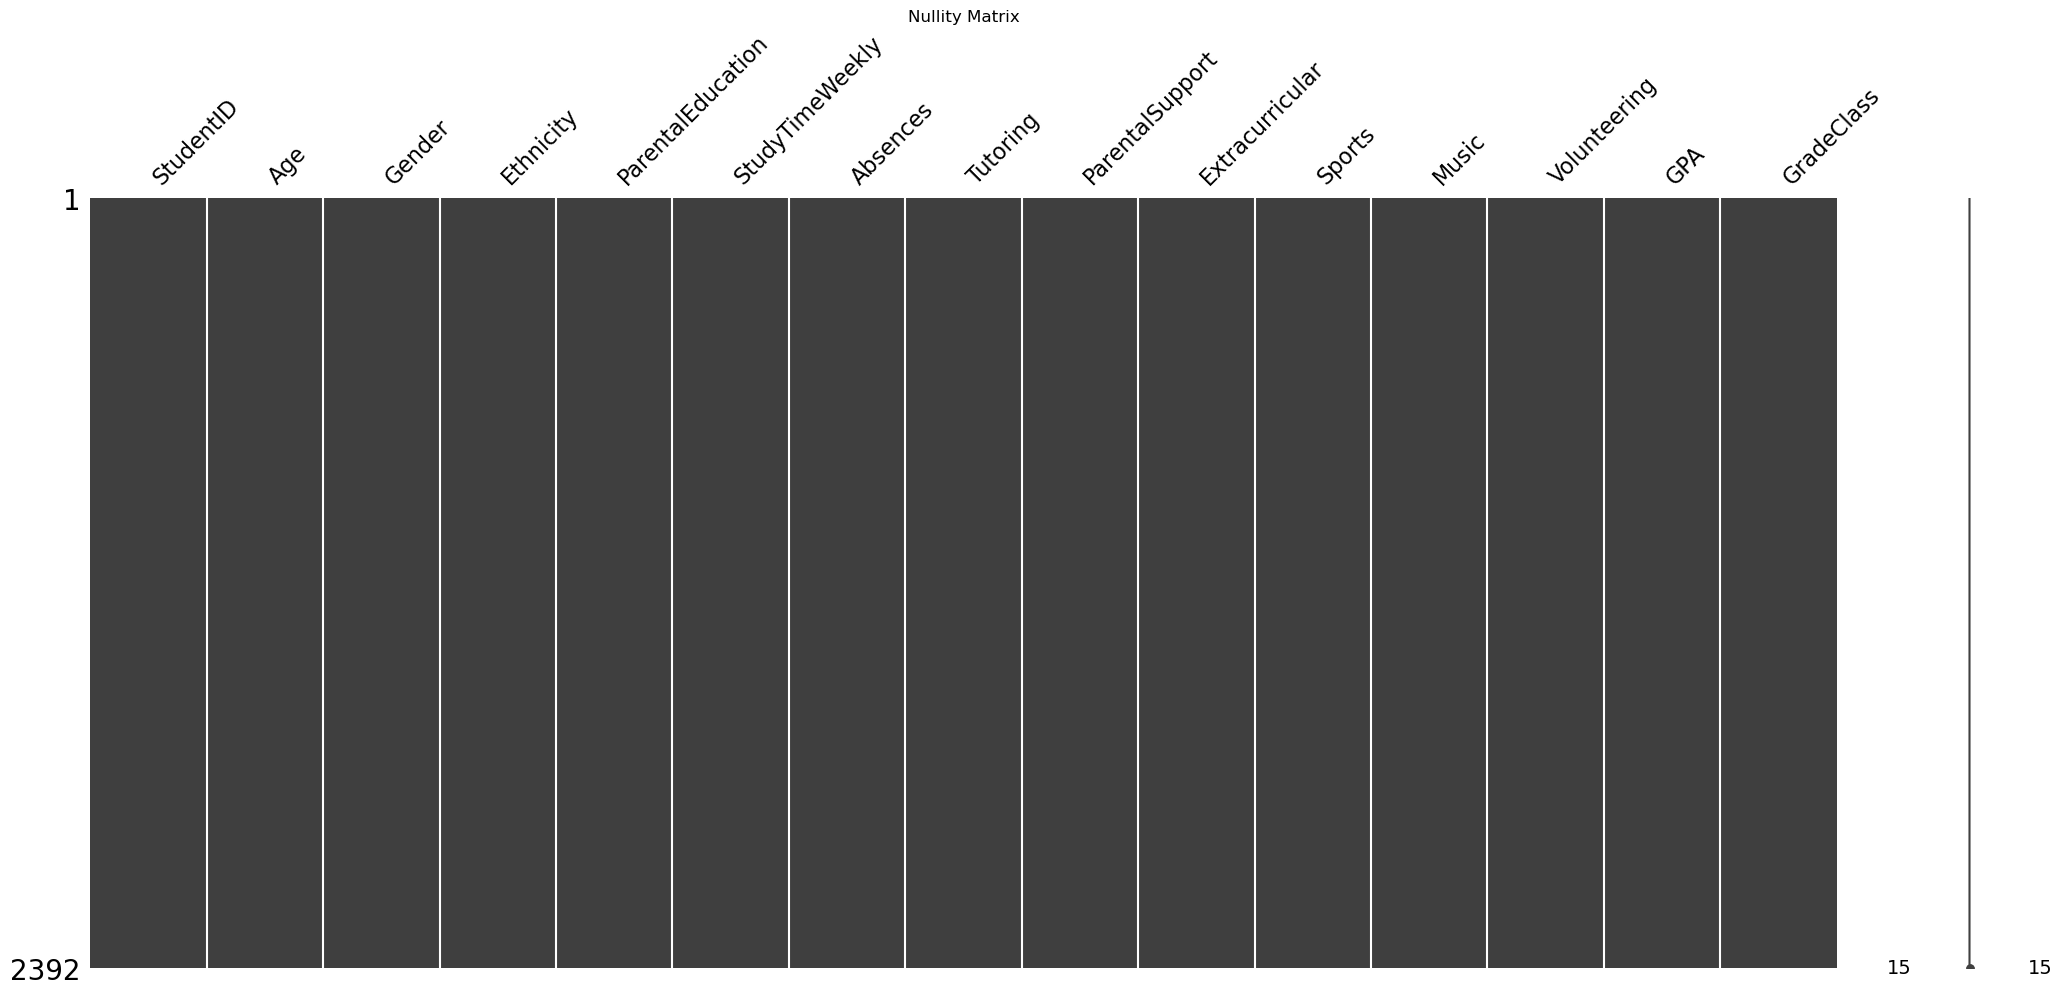

In [55]:
plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title('Nullity Matrix')
plt.show()

### GradeClass Distribution


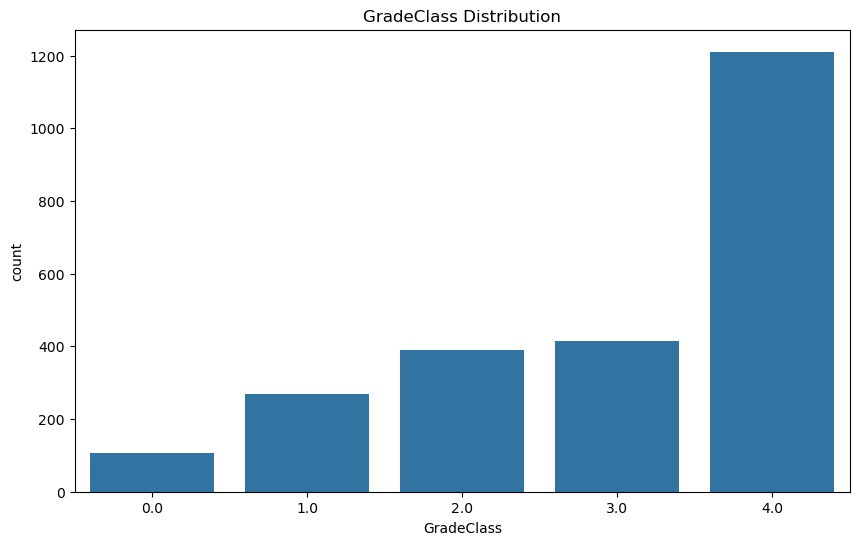

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeClass', data=df)
plt.title('GradeClass Distribution')
plt.show()

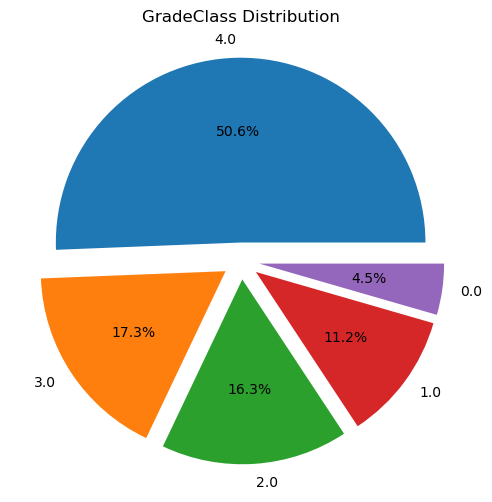

In [13]:
plt.figure(figsize=(10, 6))
df['GradeClass'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1]*len(df['GradeClass'].unique()))
plt.title('GradeClass Distribution')
plt.ylabel('')
plt.show()

### Features Distribution

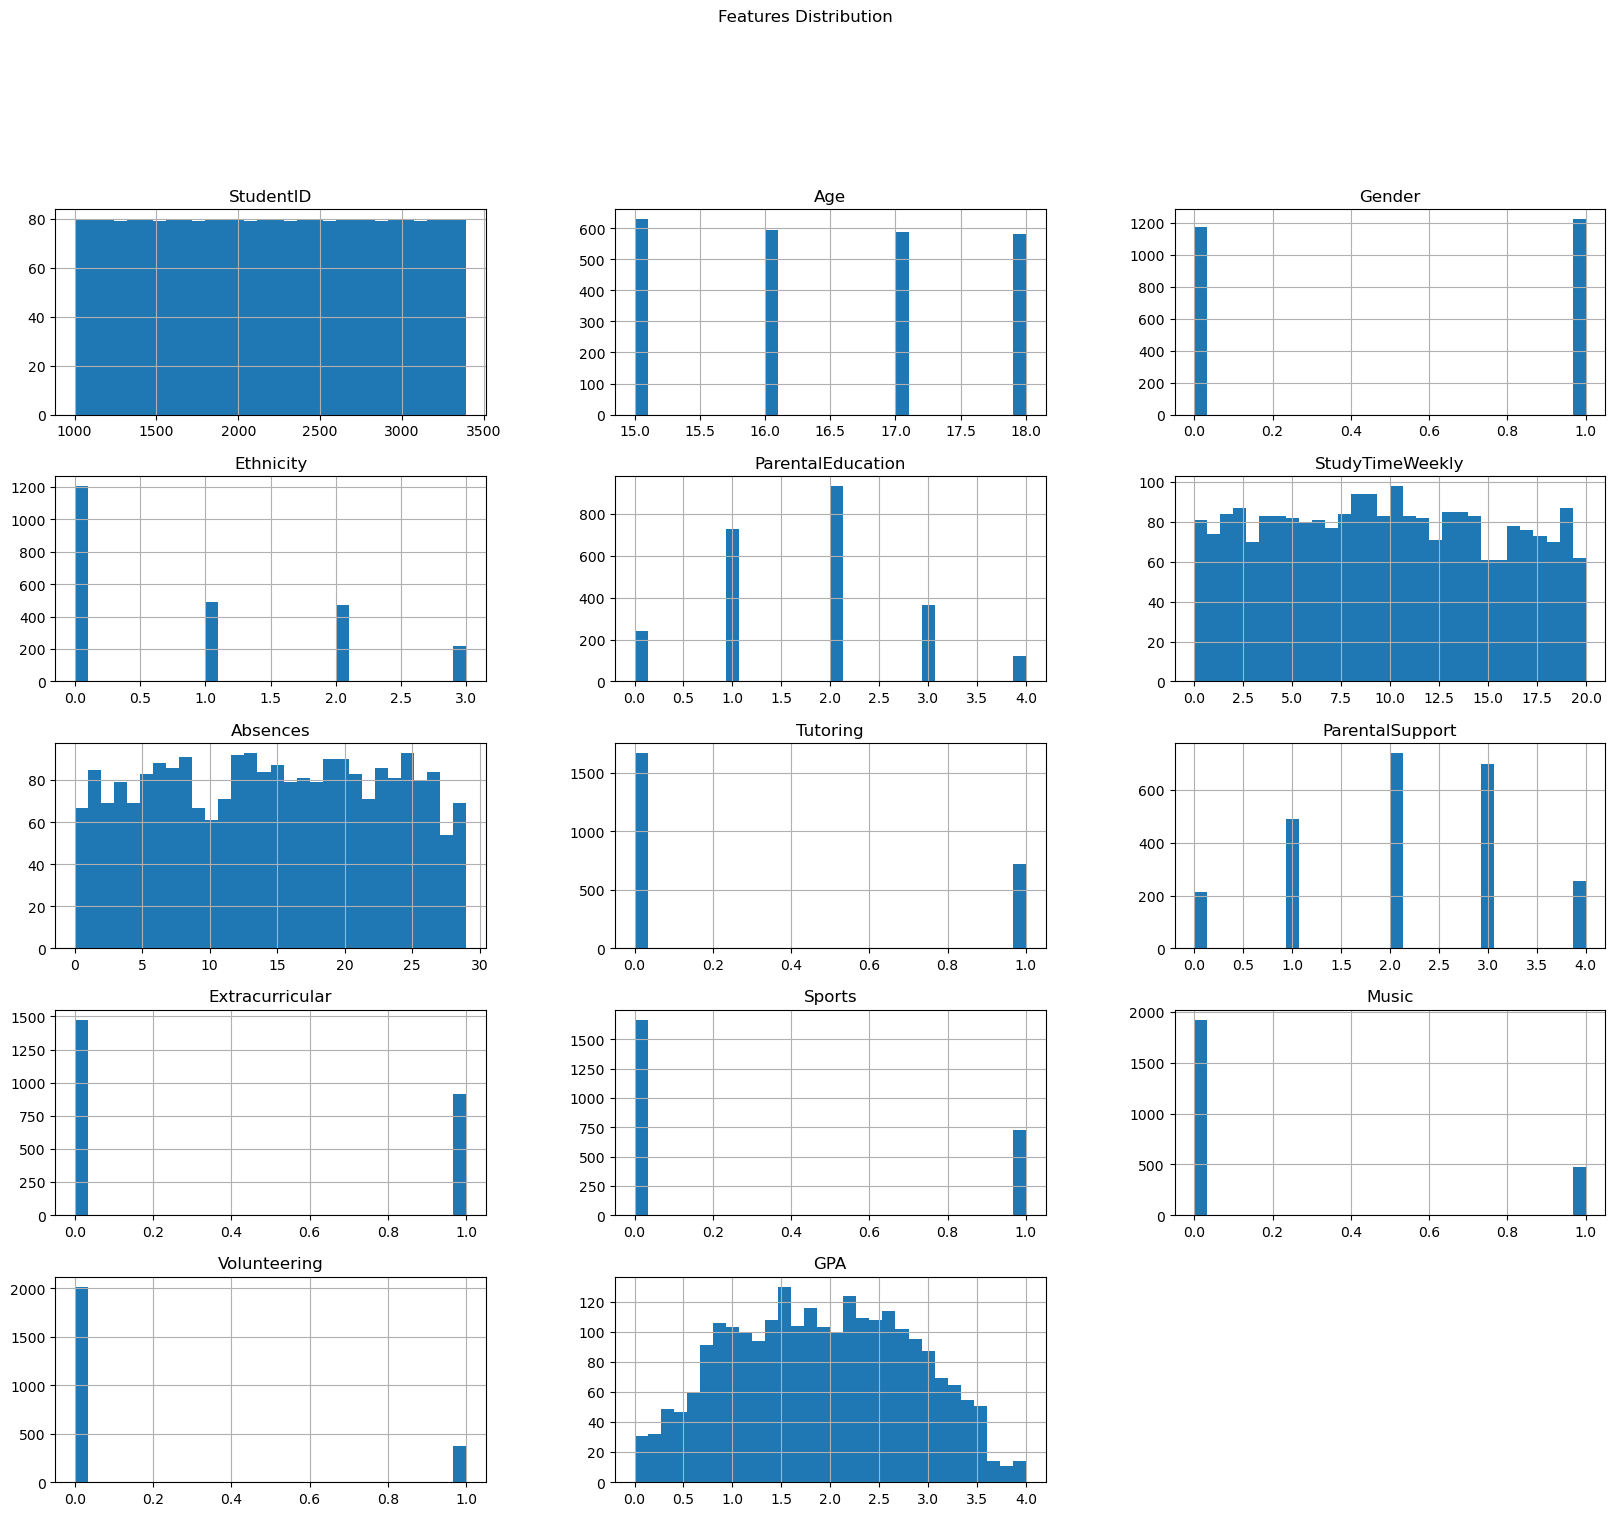

In [14]:
df.drop(['GradeClass'], axis=1).hist(bins=30, figsize=(20, 20), layout=(6, 3))
plt.suptitle('Features Distribution')
plt.show()

### Correlation Heatmap

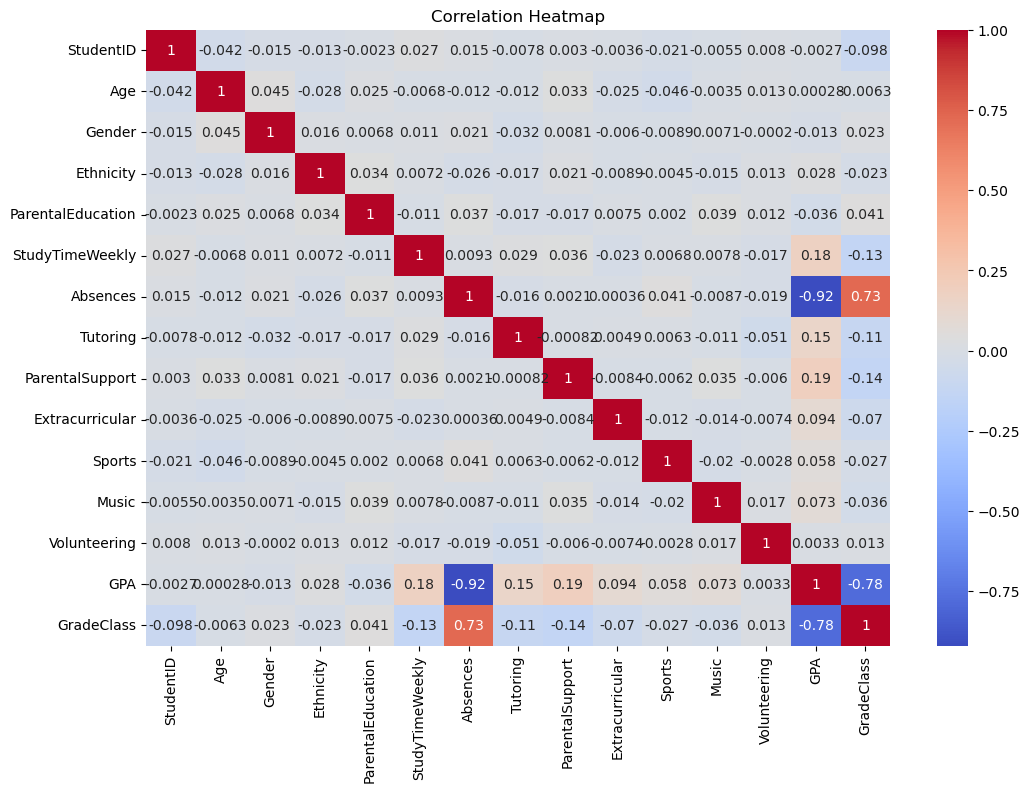

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation of Features with GradeClass


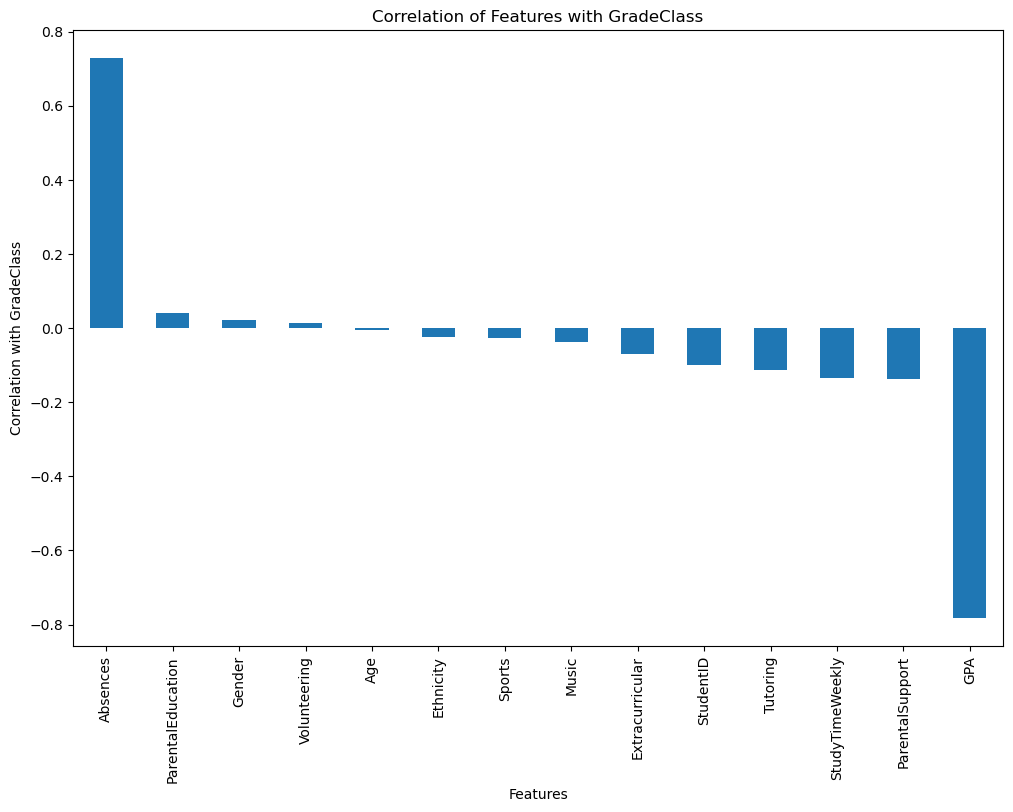

In [16]:
plt.figure(figsize=(12, 8))
df.corr()['GradeClass'].sort_values(ascending=False).drop('GradeClass').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with GradeClass')
plt.title('Correlation of Features with GradeClass')
plt.show()

### Boxplot to check for outliers (excluding 'StudentID' and 'GradeClass')


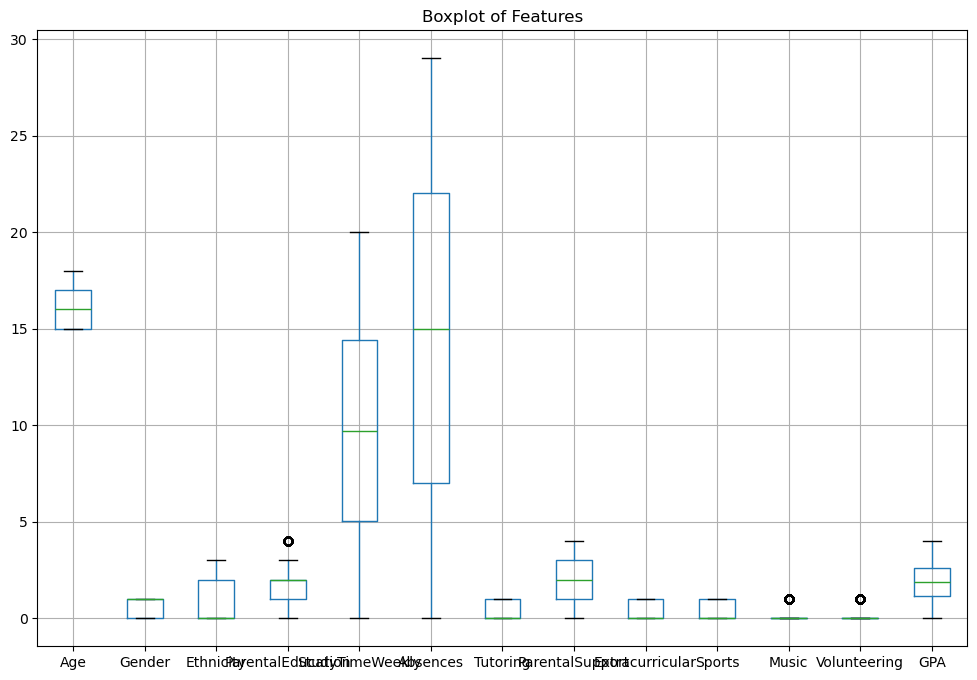

In [17]:
plt.figure(figsize=(12, 8))
df.drop(['StudentID', 'GradeClass'], axis=1).boxplot()
plt.title('Boxplot of Features')
plt.show()


# Data preprocessing:

### Remove unique and unnecessary columns


In [18]:
X = df.drop(columns=["StudentID", "GPA", 'Volunteering', 'Age'])
y = df['GradeClass']

### Discretize 'StudyTimeWeekly'

In [19]:
est = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='uniform', subsample=None)
X['StudyTimeWeekly'] = est.fit_transform(X['StudyTimeWeekly'].values.reshape(-1, 1))

### Split the dataset into training and testing sets


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Check the distribution of the target variable
print(df['GradeClass'].value_counts())

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


### handle embalmed data

In [35]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.Series(y_train_resampled)

### Build the pipeline

In [37]:
# This scaler and classifier will in the pipeline is currently a placeholder
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [38]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__monotonic_cst': None,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

### Define the parameter grid


In [39]:
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'classifier': [
        RandomForestClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        CatBoostClassifier(logging_level='Silent')
    ],
}

## Perform grid search

In [40]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier': [RandomForestClassifier(),
                                        KNeighborsClassifier(), GaussianNB(),
                                        DecisionTreeClassifier(),
                                        GradientBoostingClassifier(),
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_byno...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                                        <catboost.core.CatBoostClassifier object at 0x163dca900>],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler()]},
             scoring='accuracy')

### Get the best parameters and score

In [41]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_scaler = best_params['scaler']
best_classifier = best_params['classifier']

print(f'Best Scaler: {best_scaler}')
print(f'Best Classifier: {best_classifier}')
print(f'Best Score: {best_score}')

Best Scaler: StandardScaler()
Best Classifier: RandomForestClassifier()
Best Score: 1.0


### Train the best model

In [42]:
best_pipeline = Pipeline([
    ('scaler', best_scaler),
    ('classifier', best_classifier)
])
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

### Make predictions and evaluate the model

In [43]:
y_pred = best_pipeline.predict(X_test)
accuracy = best_pipeline.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy * 100, 2)}%')
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Accuracy: 100.0%
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2 Score: 1.0


### Evaluate the model with cross-validation

In [44]:
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9849398590159065


### Visualize model performance

### Scatter plot of actual vs predicted values

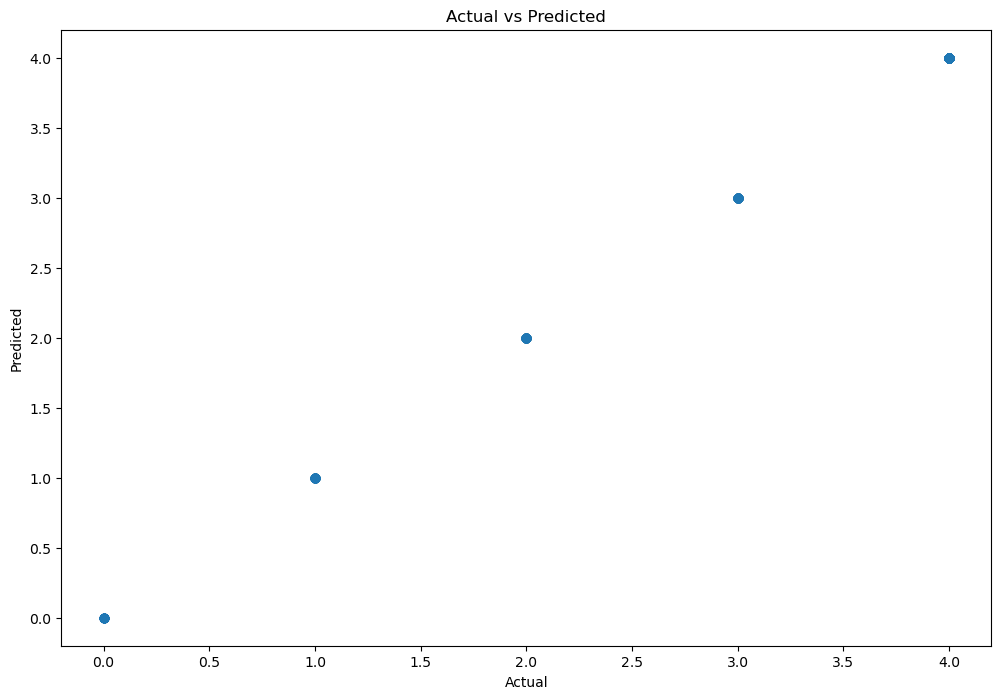

In [66]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Confusion Matrix

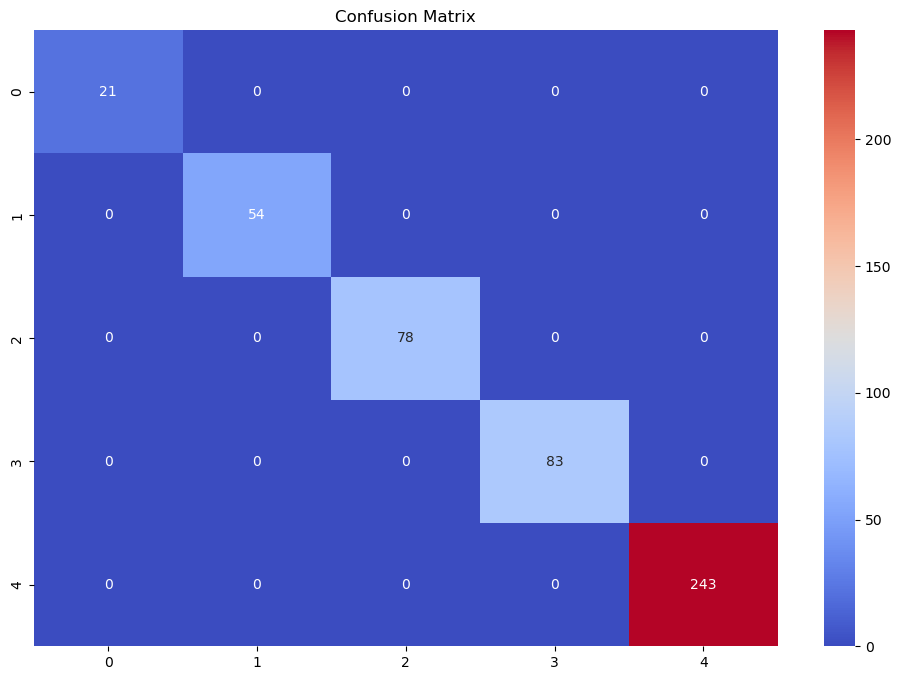

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

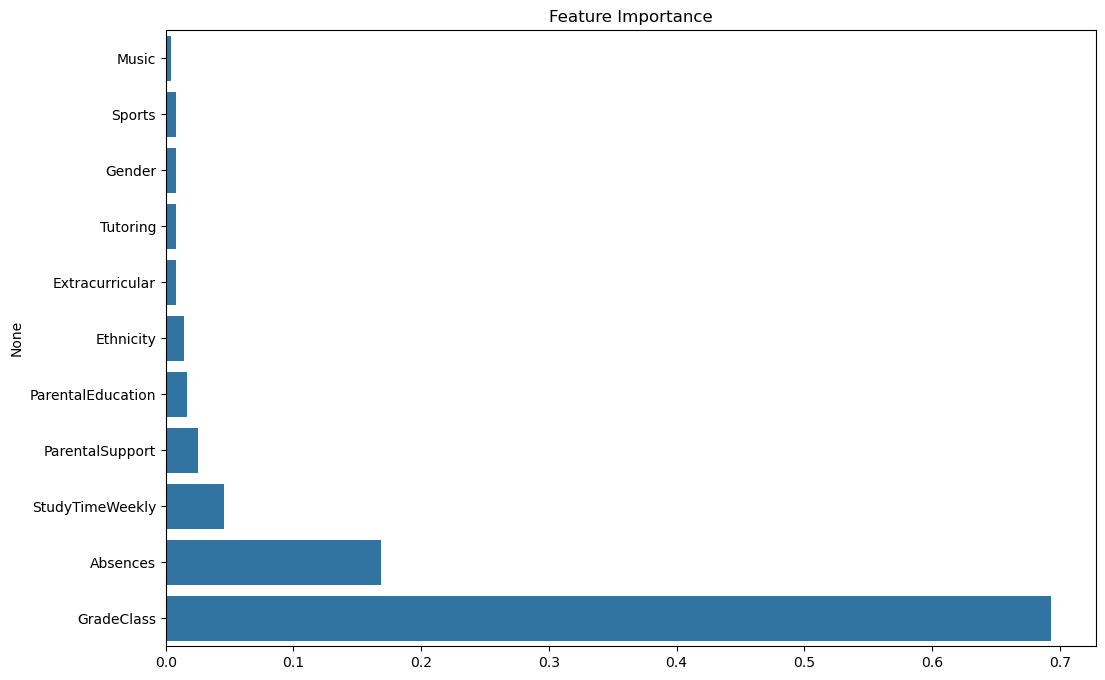

In [65]:
plt.figure(figsize=(12, 8))
feature_importances = best_classifier.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features, order=[
            x for _, x in sorted(zip(feature_importances, features))])
plt.title('Feature Importance')
plt.show()